# Quantum Distributions

Figure 3.1 from *Stellar Structure & Evolution* by Pinsonneault & Ryden, Cambridge University Press.

Plot showing Fermi-Dirac, Bose-Einstein, and Maxwell-Boltzmann distributions with $\alpha$=0, plus the 
Fermi-Dirac distribution for $\alpha$=−5.

In [3]:
%matplotlib inline

import os, sys, math
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, LogLocator, NullFormatter

import warnings
warnings.filterwarnings('ignore',category=UserWarning, append=True)
warnings.filterwarnings('ignore',category=RuntimeWarning, append=True)

## Standard Plot Format

Setup the standard plotting format and make the plot. 

In [4]:
plotFile = 'Fig3_1.png' 

# graphic aspect ratio = width/height

aspect = 4.0/3.0 

#
# Don't change these unless you really need to (we never have)
#
# fPage is the horizontal fraction of the page occupied by the figure, default 1.0
#
# scaleFac is the LaTeX includegraphics scaling in units of \textwidth, default 1.0
#

fPage = 1.0
scaleFac = 0.85

# Text width in inches - don't change, this is defined by the print layout

textWidth = 6.0 # inches

# Graphic dimensions depending on bitmap or vector format (draft vs production)

dpi = 600
plotWidth = dpi*fPage*textWidth
plotHeight = plotWidth/aspect
axisFontSize = 12
labelFontSize = 8
lwidth = 0.5
axisPad = 5
wInches = fPage*textWidth # float(plotWidth)/float(dpi)
hInches = wInches/aspect  # float(plotHeight)/float(dpi)
    
# LaTeX is used throughout for markup of symbols, Times-Roman serif font

plt.rc('text', usetex=True)
plt.rc('font', **{'family':'serif','serif':['Times-Roman'],'weight':'bold','size':'16'})

# Font and line weight defaults for axes

matplotlib.rc('axes',linewidth=lwidth)
matplotlib.rcParams.update({'font.size':axisFontSize})

# axis and label padding

plt.rcParams['xtick.major.pad']=f'{axisPad}'
plt.rcParams['ytick.major.pad']=f'{axisPad}'
plt.rcParams['axes.labelpad'] = f'{axisPad}'

## Three distributions

Parameterized in terms of E and a normalization $\alpha$

### Fermi-Dirac Distribution

$f_\textrm{state} (E) = \frac{1}{e^\alpha e^{E/kT} + 1}$

Plot with $\alpha$=0 and $\alpha$=-5

### Bose-Einstein

$f_\textrm{state} (E) = \frac{1}{e^\alpha e^{E/kT} - 1}$

Plot with $\alpha=0$

### Maxwell-Boltzmann

$f_\textrm{state} (E) = e^{-\alpha} e^{-E/kT}$

Plot with $\alpha$=0

The X-axis is u=E/kT


In [5]:
# range of u=E/kT

uMin = 0.0
uMax = 8.0

u = np.linspace(uMin,uMax,1001)

# Fermi-Dirac for alpha=0 and 5

fd0 = 1.0/(np.exp(u) + 1.0)

fd5 = 1.0/(math.exp(-5.0)*np.exp(u) + 1.0) 

# Bose-Einstein for alpha=0

be0 = 1.0/(np.exp(u) - 1.0)

# Maxwell-Boltzmann for alpha=0

mb0 = np.exp(-u)


### Figure 3.1

Plot of 4 distibutions:
 * solid = Fermi-Dirac with $\alpha$=0
 * thick solid = Fermi-Dirac with $\alpha$=$-$5
 * dotted = Bose-Einstein with $\alpha$=0
 * dashed = Maxwell-Boltzmann with $\alpha$=0
 

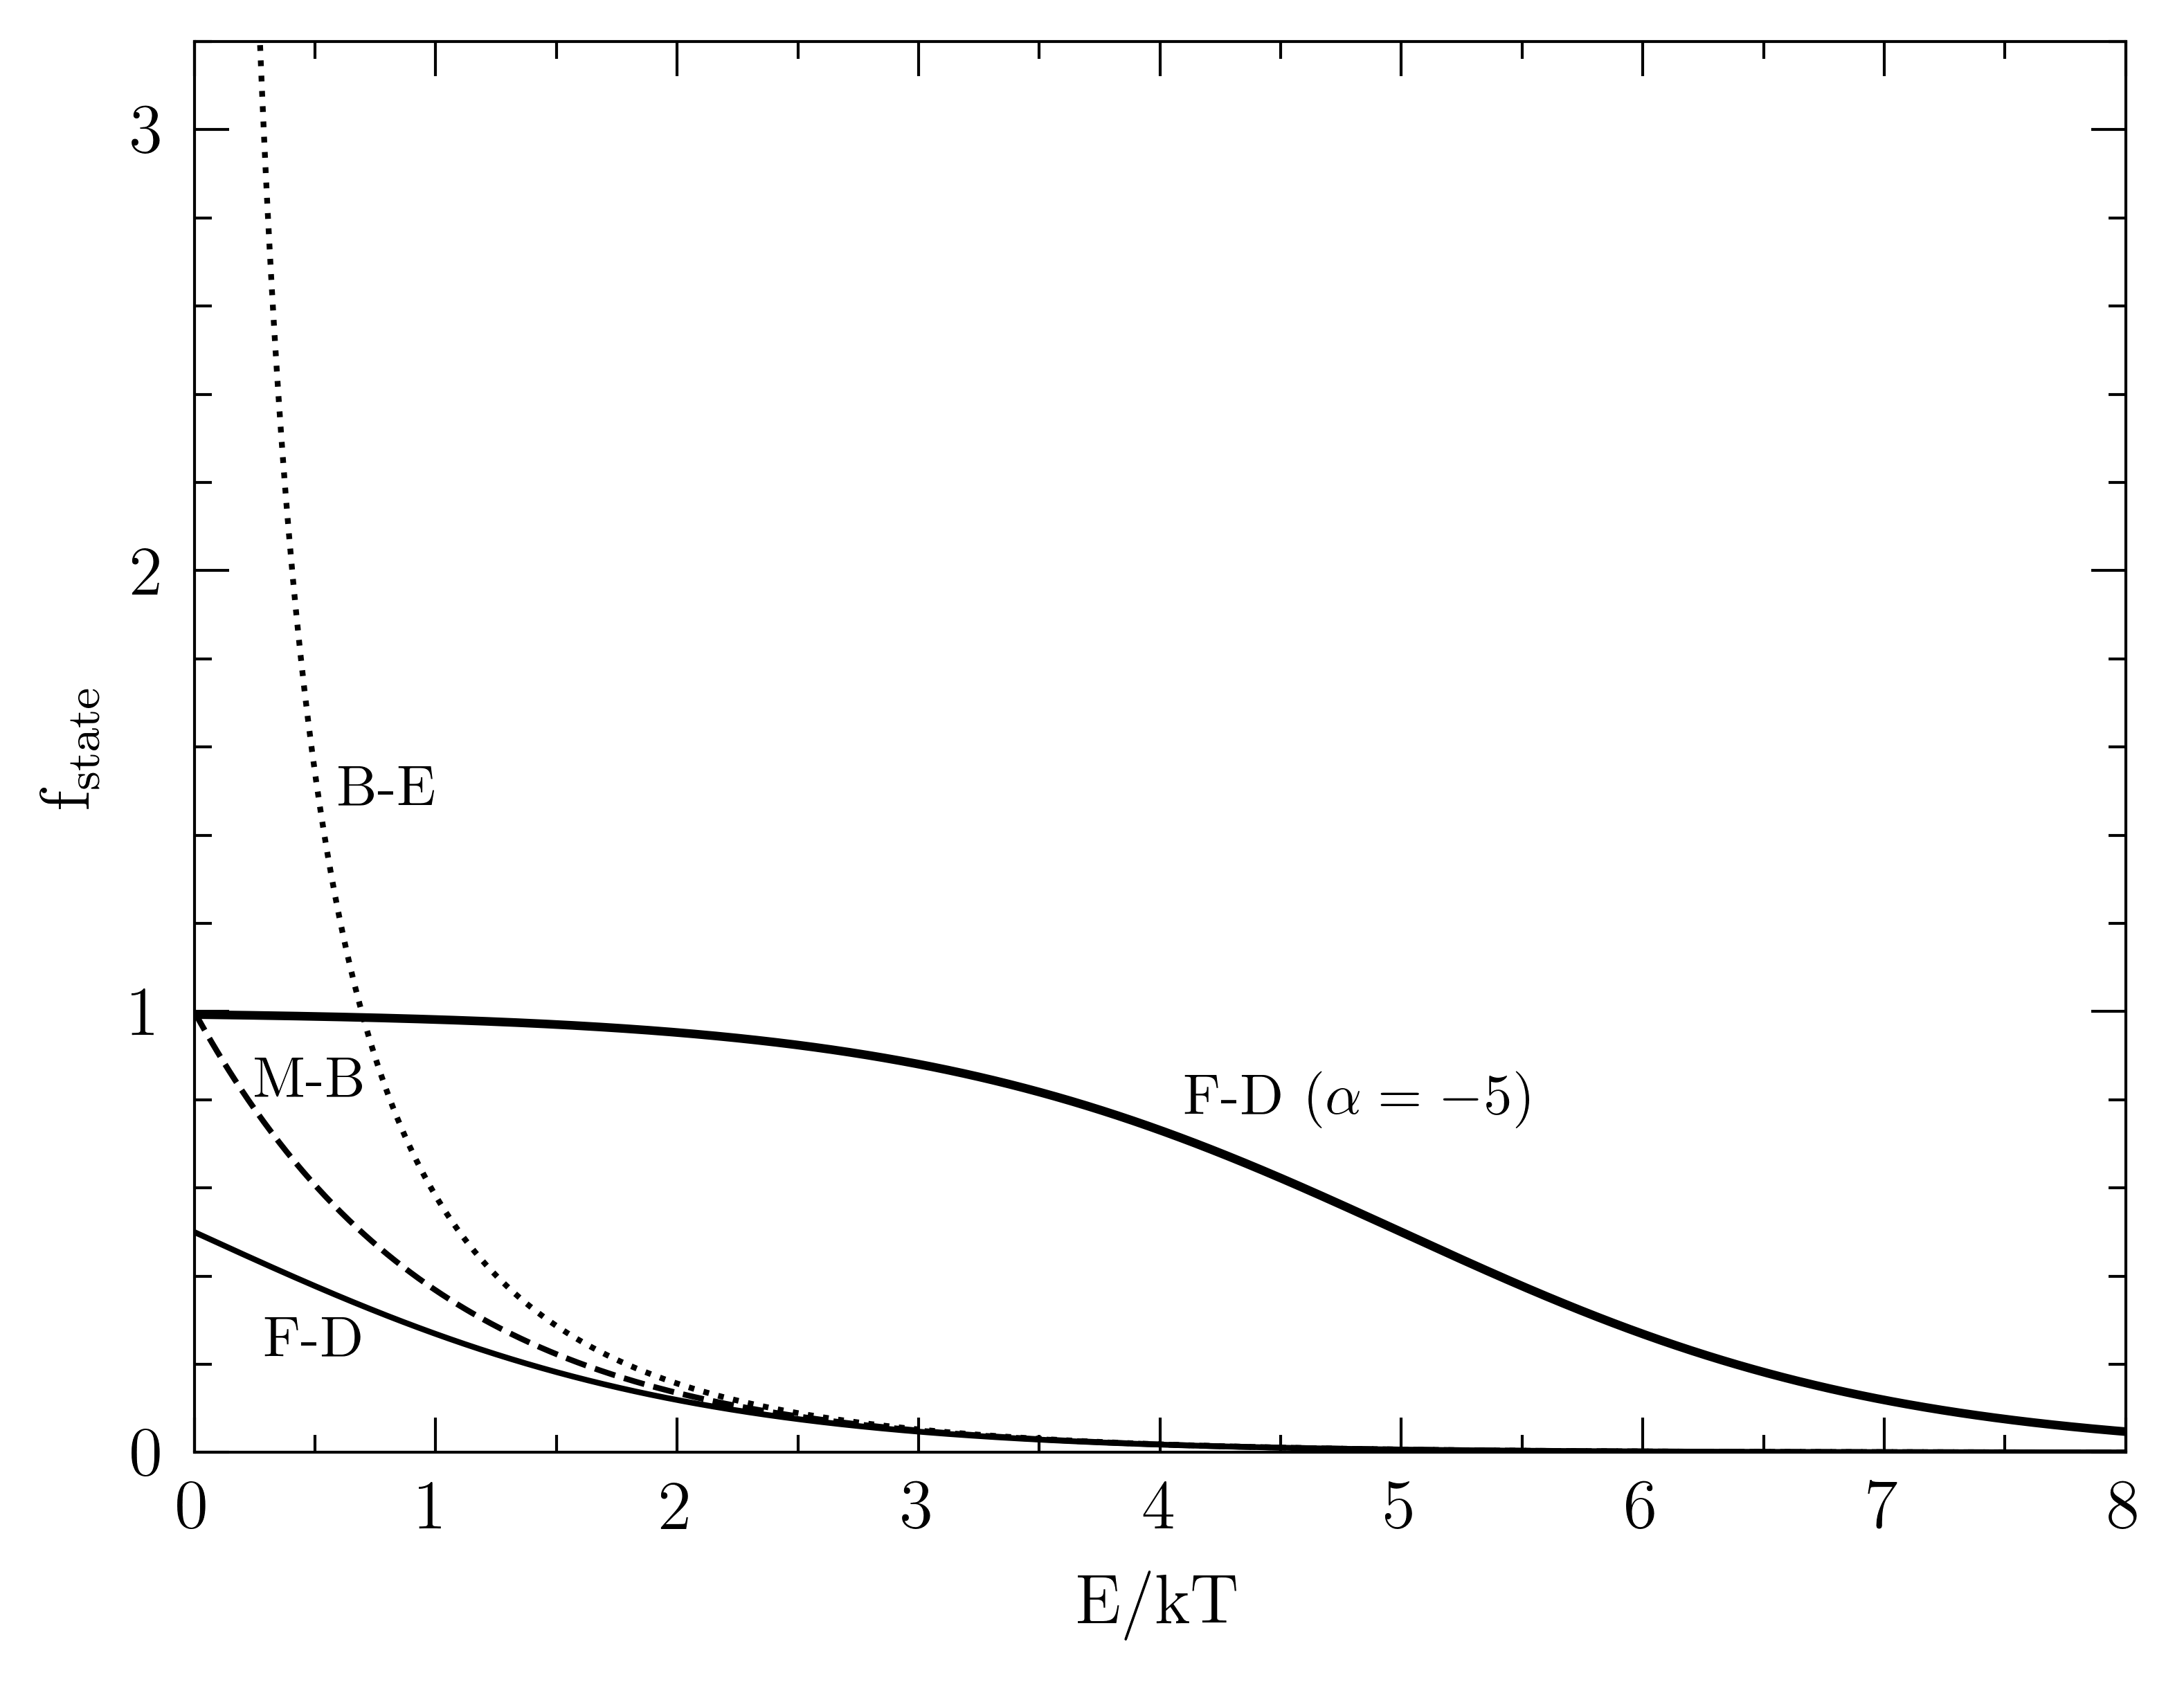

In [6]:
fig,ax = plt.subplots(figsize=(wInches,hInches),dpi=dpi)

ax.tick_params('both',length=6,width=lwidth,which='major',direction='in',top='on',right='on')
ax.tick_params('both',length=3,width=lwidth,which='minor',direction='in',top='on',right='on')

ax.set_xlim(uMin,uMax)
ax.xaxis.set_major_locator(MultipleLocator(1.0))
ax.xaxis.set_minor_locator(MultipleLocator(0.5))
ax.set_xlabel(r'E/kT',fontsize=axisFontSize)

ax.set_ylim(0.0,3.2)
ax.yaxis.set_major_locator(MultipleLocator(1.0))
ax.yaxis.set_minor_locator(MultipleLocator(0.2))
ax.set_ylabel(r'f$_{\rm state}$',fontsize=axisFontSize)

ax.plot(u,fd0,'-',color='black',lw=1.0,zorder=10)
ax.text(0.5,0.25,'F-D',ha='center',va='center',fontsize=10)

ax.plot(u,fd5,'-',color='black',lw=1.5,zorder=10)
ax.text(4.1,0.8,r'F-D ($\alpha=-5$)',ha='left',va='center',fontsize=10)

ax.plot(u,be0,':',color='black',lw=1.0,zorder=10)
ax.text(0.8,1.5,'B-E',ha='center',va='center',fontsize=10)

ax.plot(u,mb0,'--',color='black',lw=1.0,zorder=10)
ax.text(0.25,0.78,'M-B',ha='left',va='bottom',fontsize=10)

plt.plot()
plt.savefig(plotFile,bbox_inches='tight',facecolor='white')